# Problema

Predecir el tipo de flor

# El set de datos

Número de Instancias:

El conjunto de datos Iris consta de 150 muestras de flores Iris con 4 características cada una.

Características:

* Longitud del sépalo (sepal length)
* Ancho del sépalo (sepal width)
* Longitud del pétalo (petal length)
* Ancho del pétalo (petal width)

Clases o Etiquetas:

* Setosa
* Versicolor
* Virginica



In [5]:
# imports
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd

In [6]:
# Create a DataFrame
df = pd.read_csv('dataset_banco_clean.csv')

# Add the target variable (species) to the DataFrame
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261.0,1,-1.0,0,unknown,no
1,44,technician,single,secondary,no,29.0,yes,no,unknown,5,may,151.0,1,-1.0,0,unknown,no
2,33,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76.0,1,-1.0,0,unknown,no
3,47,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92.0,1,-1.0,0,unknown,no
4,33,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198.0,1,-1.0,0,unknown,no


# Objetivo

Generar un model de clasificación capaz de predecir la clase de flor en función de las carácterísticas del dataset

* Aplicar las técnicas oportunas de procesamiento de datos

* Valorar diferentes modelos de clasificación

* Comparación entre modelos

* Ensemble

* Métricas

* Conclusiones finales

In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error, mean_squared_log_error, roc_curve, auc
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbpipeline
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.base import BaseEstimator, TransformerMixin

# data viz
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from itertools import cycle
import pylab as pl

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45189 entries, 0 to 45188
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45189 non-null  int64  
 1   job        45189 non-null  object 
 2   marital    45189 non-null  object 
 3   education  45189 non-null  object 
 4   default    45189 non-null  object 
 5   balance    45189 non-null  float64
 6   housing    45189 non-null  object 
 7   loan       45189 non-null  object 
 8   contact    45189 non-null  object 
 9   day        45189 non-null  int64  
 10  month      45189 non-null  object 
 11  duration   45189 non-null  float64
 12  campaign   45189 non-null  int64  
 13  pdays      45189 non-null  float64
 14  previous   45189 non-null  int64  
 15  poutcome   45189 non-null  object 
 16  y          45189 non-null  object 
dtypes: float64(3), int64(4), object(10)
memory usage: 5.9+ MB


In [9]:
df.shape

(45189, 17)

## KNN

In [10]:
X = df.drop('y', axis=1)
y = df['y']

x_train, x_test_val, y_train, y_test_val = train_test_split(X, y, test_size=0.3, random_state=42)
x_test, x_val, y_test, y_val = train_test_split(x_test_val, y_test_val, test_size=0.5, random_state=42)

numeric_features = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
categorical_features = ['marital', 'housing', 'loan', 'contact', 'job', 'month', 'poutcome', 'education']

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create the KNN classifier
knn_model = imbpipeline(steps=[
    ('preprocessor', preprocessor),
    ('sampler', SMOTE(random_state=42)),  # SMOTE
    ('classifier', KNeighborsClassifier())
])

# Train the model on the training data
knn_model.fit(x_train, y_train)

# Make predictions on the validation set
y_val_pred = knn_model.predict(x_val)

# Evaluate the model on the validation set
accuracy = accuracy_score(y_val, y_val_pred)
conf_matrix = confusion_matrix(y_val, y_val_pred)
class_report = classification_report(y_val, y_val_pred)

# Display evaluation metrics
print("Validation Set:")
print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:\n', conf_matrix)
print('Classification Report:\n', class_report)

Validation Set:
Accuracy: 0.84
Confusion Matrix:
 [[5120  861]
 [ 200  598]]
Classification Report:
               precision    recall  f1-score   support

          no       0.96      0.86      0.91      5981
         yes       0.41      0.75      0.53       798

    accuracy                           0.84      6779
   macro avg       0.69      0.80      0.72      6779
weighted avg       0.90      0.84      0.86      6779



## SVM

In [11]:
svm_model = imbpipeline(steps=[
    ('preprocessor', preprocessor),
    ('sampler', SMOTE(random_state=42)),  # SMOTE
    ('classifier', SVC(kernel='rbf', random_state=42))  # Usando el kernel radial
])

# Entrenar el modelo en los datos de entrenamiento
svm_model.fit(x_train, y_train)

# Realizar predicciones en el conjunto de validación
y_val_pred_svm = svm_model.predict(x_val)

# Evaluar el modelo en el conjunto de validación
accuracy_svm = accuracy_score(y_val, y_val_pred_svm)
conf_matrix_svm = confusion_matrix(y_val, y_val_pred_svm)
class_report_svm = classification_report(y_val, y_val_pred_svm)

# Mostrar métricas de evaluación
print("Conjunto de Validación - SVM:")
print(f'Exactitud: {accuracy_svm:.2f}')
print('Matriz de Confusión:\n', conf_matrix_svm)
print('Reporte de Clasificación:\n', class_report_svm)

Conjunto de Validación - SVM:
Exactitud: 0.87
Matriz de Confusión:
 [[5245  736]
 [ 149  649]]
Reporte de Clasificación:
               precision    recall  f1-score   support

          no       0.97      0.88      0.92      5981
         yes       0.47      0.81      0.59       798

    accuracy                           0.87      6779
   macro avg       0.72      0.85      0.76      6779
weighted avg       0.91      0.87      0.88      6779



In [12]:
from sklearn.metrics import f1_score

f1_svm = f1_score(y_val, y_val_pred_svm, pos_label='yes')
print("\nPuntaje F1 - SVM:")
print(f'Puntaje F1: {f1_svm:.2f}')


Puntaje F1 - SVM:
Puntaje F1: 0.59


## RANDOMFOREST 

In [13]:
X = df.drop('y', axis=1)
y = df['y']

x_train, x_test_val, y_train, y_test_val = train_test_split(X, y, test_size=0.3, random_state=42)

numeric_features = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
categorical_features = ['marital', 'housing', 'loan', 'contact', 'job', 'month', 'poutcome', 'education']

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

model = imbpipeline(steps=[
    ('preprocessor', preprocessor),
    ('sampler', SMOTE(random_state=42)),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Hyperparameter tuning
param_grid = {
    'classifier__n_estimators': [100],
    'classifier__max_depth': [None],
    'classifier__min_samples_split': [2],
    'classifier__min_samples_leaf': [1]
}

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(x_train, y_train)

best_model = grid_search.best_estimator_

y_pred = best_model.predict(x_test)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', conf_matrix)

class_report = classification_report(y_test, y_pred)
print('Classification Report:\n', class_report)

# Display best hyperparameters
print('Best Hyperparameters:', grid_search.best_params_)

Accuracy: 0.90
Confusion Matrix:
 [[5686  304]
 [ 372  416]]
Classification Report:
               precision    recall  f1-score   support

          no       0.94      0.95      0.94      5990
         yes       0.58      0.53      0.55       788

    accuracy                           0.90      6778
   macro avg       0.76      0.74      0.75      6778
weighted avg       0.90      0.90      0.90      6778

Best Hyperparameters: {'classifier__max_depth': None, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 100}


## DECISION TREE

In [14]:
X = df.drop('y', axis=1)
y = df['y']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

numeric_features = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
categorical_features = ['marital', 'housing', 'loan', 'contact', 'job', 'month', 'poutcome', 'education']

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

model = imbpipeline(steps=[
    ('preprocessor', preprocessor),
    ('sampler', SMOTE(random_state=42)),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

# Hyperparameter tuning
param_grid = {
    'classifier__max_depth': [20, 30],
    'classifier__min_samples_split': [2],
    'classifier__min_samples_leaf': [1]
}

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(x_train, y_train)

best_model = grid_search.best_estimator_

y_pred = best_model.predict(x_test)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', conf_matrix)

class_report = classification_report(y_test, y_pred)
print('Classification Report:\n', class_report)

# Display best hyperparameters
print('Best Hyperparameters:', grid_search.best_params_)

Accuracy: 0.87
Confusion Matrix:
 [[10941  1030]
 [  697   889]]
Classification Report:
               precision    recall  f1-score   support

          no       0.94      0.91      0.93     11971
         yes       0.46      0.56      0.51      1586

    accuracy                           0.87     13557
   macro avg       0.70      0.74      0.72     13557
weighted avg       0.88      0.87      0.88     13557

Best Hyperparameters: {'classifier__max_depth': 20, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2}


## XGB

In [15]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(df['y'])

X = df.drop('y', axis=1)
y = y_encoded

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

numeric_features = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
categorical_features = ['marital', 'housing', 'loan', 'contact', 'job', 'month', 'poutcome', 'education']

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

model = imbpipeline(steps=[
    ('preprocessor', preprocessor),
    ('sampler', SMOTE(random_state=42)),
    ('classifier', XGBClassifier(random_state=42))
])

# Hyperparameter tuning
param_grid = {
    'classifier__max_depth': [5],  # Example depths, adjust as needed
    'classifier__learning_rate': [0.1],
    'classifier__n_estimators': [100]
}

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(x_train, y_train)

best_model = grid_search.best_estimator_

y_pred = best_model.predict(x_test)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', conf_matrix)

class_report = classification_report(y_test, y_pred)
print('Classification Report:\n', class_report)

# Display best hyperparameters
print('Best Hyperparameters:', grid_search.best_params_)


Accuracy: 0.89
Confusion Matrix:
 [[11039   932]
 [  504  1082]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.92      0.94     11971
           1       0.54      0.68      0.60      1586

    accuracy                           0.89     13557
   macro avg       0.75      0.80      0.77     13557
weighted avg       0.91      0.89      0.90     13557

Best Hyperparameters: {'classifier__learning_rate': 0.1, 'classifier__max_depth': 5, 'classifier__n_estimators': 100}


## ENSEMBLE RFC & XGB

In [16]:
class SMOTETransformer(BaseEstimator, TransformerMixin):
    def __init__(self, random_state=42):
        self.random_state = random_state
        self.smote = SMOTE(random_state=self.random_state)
        
    def fit(self, X, y):
        X_resampled, y_resampled = self.smote.fit_resample(X, y)
        return self
    
    def transform(self, X):
        return X

# Load data
X = df.drop('y', axis=1)
y = df['y']

# Train-test split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define features
numeric_features = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
categorical_features = ['marital', 'housing', 'loan', 'contact', 'job', 'month', 'poutcome', 'education']

# Define transformers
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Define models
rf_model = RandomForestClassifier(random_state=42)
xgb_model = XGBClassifier(random_state=42)

# Define SMOTE pipeline
smote_pipeline = imbpipeline(steps=[
    ('preprocessor', preprocessor),
    ('sampler', SMOTETransformer(random_state=42))
])

# Define ensemble model
ensemble_model = VotingClassifier(estimators=[
    ('rf', rf_model),
    ('xgb', xgb_model)
], voting='soft')

# Define full pipeline
full_pipeline = Pipeline(steps=[
    ('smote_pipeline', smote_pipeline),
    ('ensemble_model', ensemble_model)
])

# Hyperparameter tuning (optional)
param_grid = {
    'ensemble_model__rf__n_estimators': [100],
    'ensemble_model__rf__max_depth': [None],
    'ensemble_model__rf__min_samples_split': [2],
    'ensemble_model__rf__min_samples_leaf': [1],
    'ensemble_model__xgb__max_depth': [3, 7],
    'ensemble_model__xgb__learning_rate': [0.01],
    'ensemble_model__xgb__n_estimators': [300]
}

grid_search = GridSearchCV(full_pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(x_train, y_train)

best_model = grid_search.best_estimator_

y_pred = best_model.predict(x_test)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', conf_matrix)

class_report = classification_report(y_test, y_pred)
print('Classification Report:\n', class_report)

# Display best hyperparameters
print('Best Hyperparameters:', grid_search.best_params_)

Accuracy: 0.91
Confusion Matrix:
 [[11698   273]
 [  995   591]]
Classification Report:
               precision    recall  f1-score   support

          no       0.92      0.98      0.95     11971
         yes       0.68      0.37      0.48      1586

    accuracy                           0.91     13557
   macro avg       0.80      0.67      0.72     13557
weighted avg       0.89      0.91      0.89     13557

Best Hyperparameters: {'ensemble_model__rf__max_depth': None, 'ensemble_model__rf__min_samples_leaf': 1, 'ensemble_model__rf__min_samples_split': 2, 'ensemble_model__rf__n_estimators': 100, 'ensemble_model__xgb__learning_rate': 0.01, 'ensemble_model__xgb__max_depth': 7, 'ensemble_model__xgb__n_estimators': 300}


In [17]:
from sklearn.metrics import f1_score

f1_micro = f1_score(y_test, y_pred, average='micro')
print(f'F1-micro Score: {f1_micro:.2f}')

F1-micro Score: 0.91


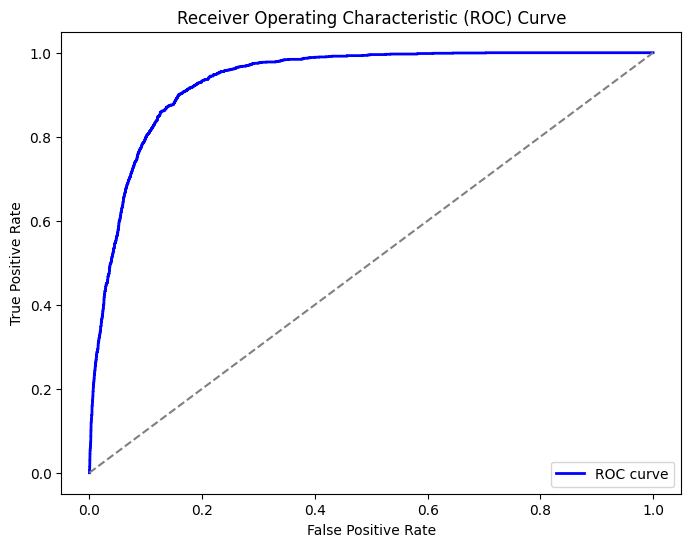

AUC: 0.93


In [18]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Convert target variable to binary format
y_test_binary = y_test.map({'yes': 1, 'no': 0})

# Train the best model on the entire training data
best_model.fit(x_train, y_train)

# Obtain predicted probabilities for the positive class
y_prob = best_model.predict_proba(x_test)[:, 1]

# Calculate the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test_binary, y_prob)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Calculate AUC
auc = roc_auc_score(y_test_binary, y_prob)
print(f'AUC: {auc:.2f}')

# Conclusiones

Vemos que todos los modelos son bastantes buenos